In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
url ="https://raw.githubusercontent.com/hkusda7005group10/groupdata/refs/heads/main/7005groupdata.csv"
df = pd.read_csv(url)

In [2]:
print(df.head())
print(df.describe())
print(df.info())

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [5]:

movies_df = df[df['type'] == 'MOVIE']
print(movies_df.head())


   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
5      5   tm14873                      Dirty Harry  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
5  When a madman dubbed 'Scorpio' terrorizes San ...          1971   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/1791567430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['decade'] = (movies_df['release_year'] // 10) * 10
/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/1791567430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(ax=axes[1], x='decade', y='runtime', data=avg_runtime_by_decade, palette='coolwarm')


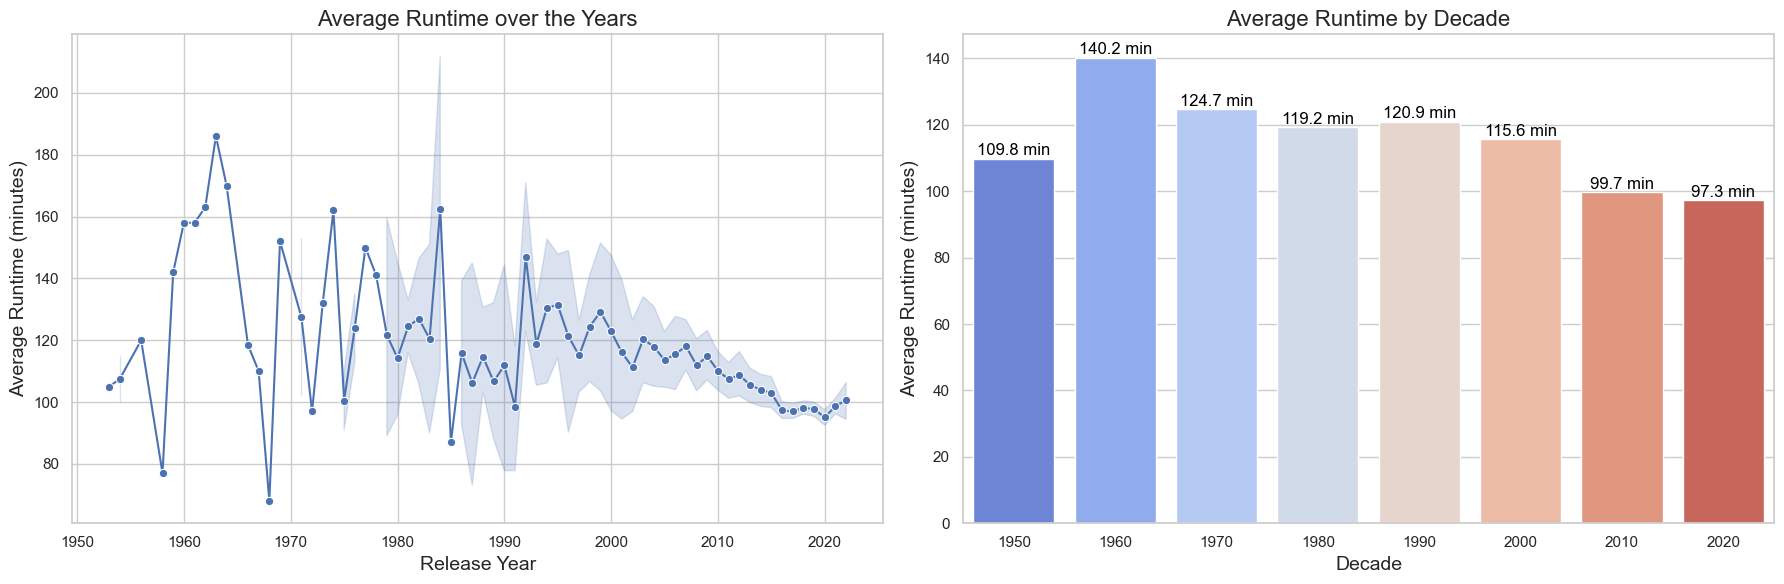

In [49]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 图1：每年电影的平均时长折线图
sns.lineplot(ax=axes[0], x='release_year', y='runtime', data=movies_df, marker='o')
axes[0].set_title('Average Runtime over the Years', fontsize=16)
axes[0].set_xlabel('Release Year', fontsize=14)
axes[0].set_ylabel('Average Runtime (minutes)', fontsize=14)

# 图2：每十年电影的平均时长条形图
movies_df['decade'] = (movies_df['release_year'] // 10) * 10
avg_runtime_by_decade = movies_df.groupby('decade')['runtime'].mean().reset_index()
bar_plot = sns.barplot(ax=axes[1], x='decade', y='runtime', data=avg_runtime_by_decade, palette='coolwarm')
axes[1].set_title('Average Runtime by Decade', fontsize=16)
axes[1].set_xlabel('Decade', fontsize=14)
axes[1].set_ylabel('Average Runtime (minutes)', fontsize=14)

# 在条形图上标注具体数值
for index, row in avg_runtime_by_decade.iterrows():
    bar_plot.text(index, row['runtime'] + 1, f'{row["runtime"]:.1f} min', ha='center', color='black', fontsize=12)

# 展示图表
plt.tight_layout()
plt.show()

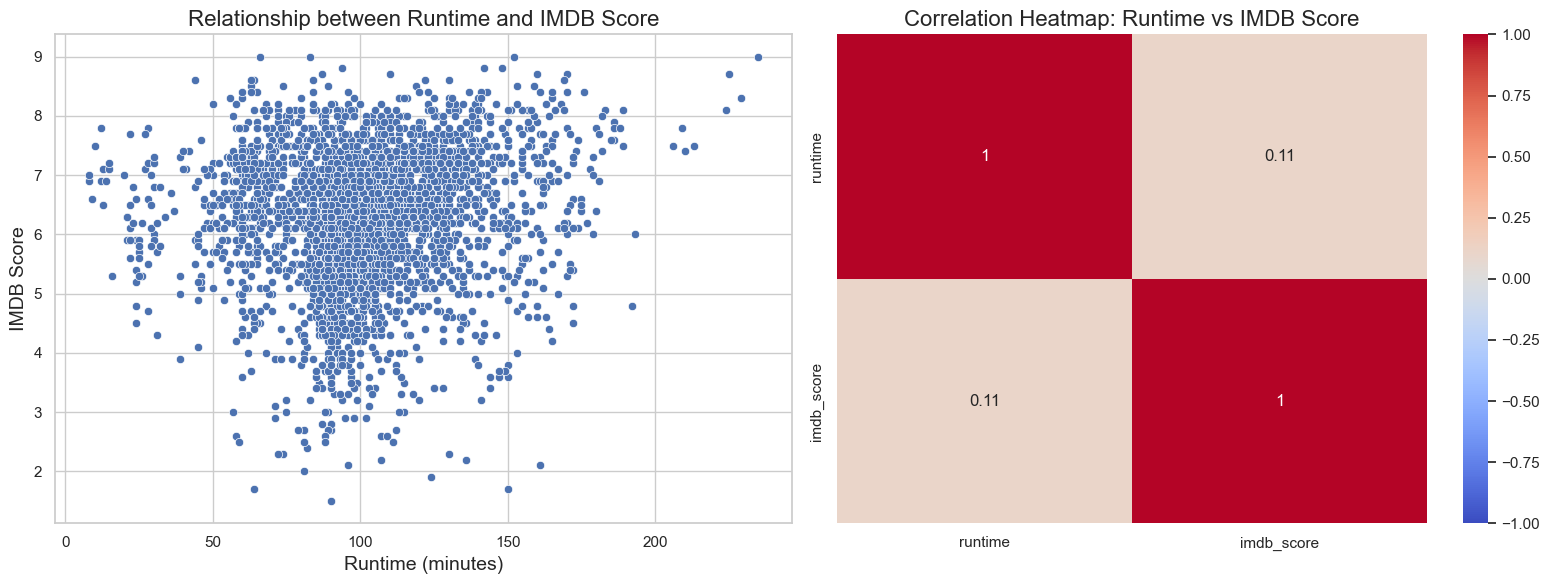

In [54]:

# 设置 Seaborn 的主题
sns.set(style="whitegrid")

# 创建 1行2列的图形布局
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 图1：散点图 - Runtime vs IMDB Score
sns.scatterplot(ax=axes[0], x='runtime', y='imdb_score', data=movies_df)
axes[0].set_title('Relationship between Runtime and IMDB Score', fontsize=16)
axes[0].set_xlabel('Runtime (minutes)', fontsize=14)
axes[0].set_ylabel('IMDB Score', fontsize=14)

# 图2：热力图 - Correlation Heatmap
correlation_matrix = movies_df[['runtime', 'imdb_score']].corr()
sns.heatmap(ax=axes[1], data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
axes[1].set_title('Correlation Heatmap: Runtime vs IMDB Score', fontsize=16)

# 调整布局并显示图表
plt.tight_layout()
plt.show()

/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/2627786574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/2627786574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


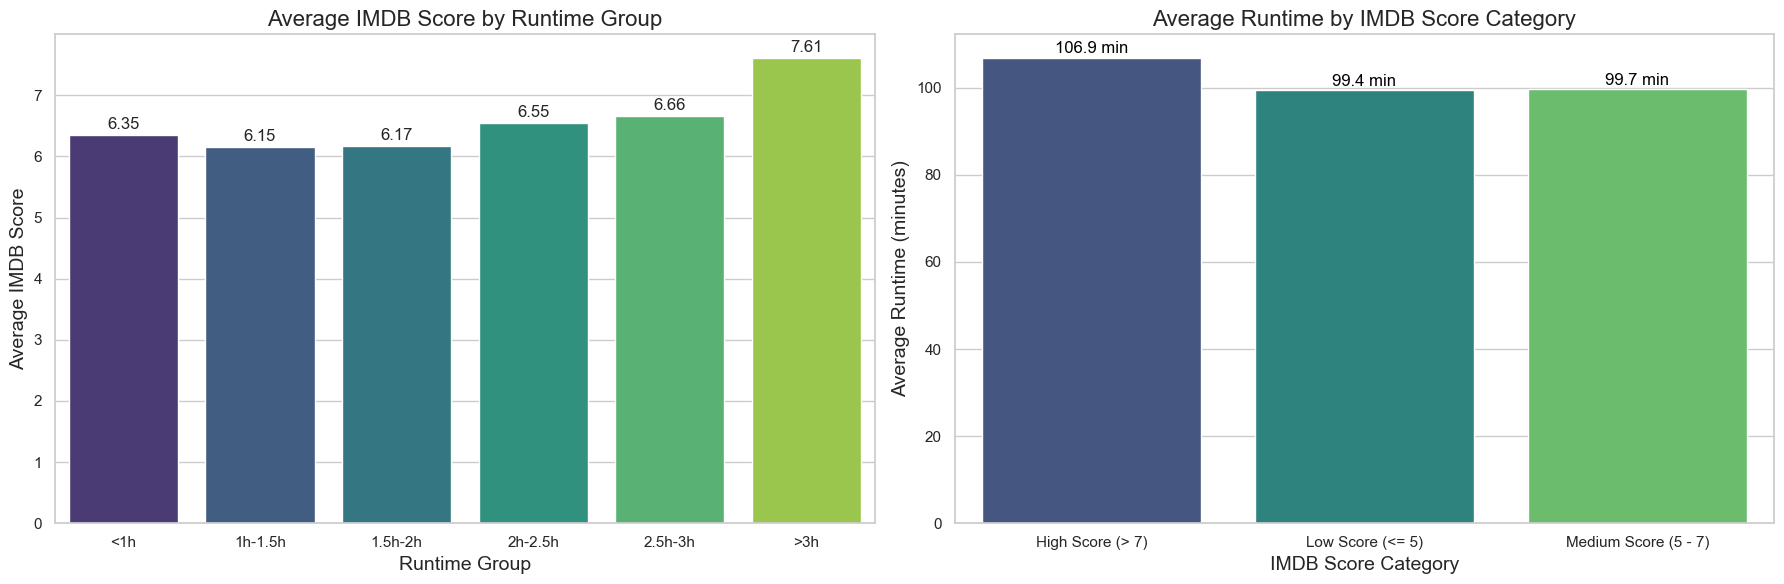

In [58]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 第一幅图：runtime 组别下的平均评分
sns.barplot(
    x='runtime_group', y='imdb_score', data=avg_score_by_runtime_group, palette='viridis', ax=axes[0]
)
axes[0].set_title('Average IMDB Score by Runtime Group', fontsize=16)
axes[0].set_xlabel('Runtime Group', fontsize=14)
axes[0].set_ylabel('Average IMDB Score', fontsize=14)

# 在条形图上方显示平均评分
for index, row in avg_score_by_runtime_group.iterrows():
    axes[0].text(index, row['imdb_score'] + 0.1, f'{row["imdb_score"]:.2f}', ha='center', fontsize=12)

# 第二幅图：评分组别下的平均 runtime
sns.barplot(
    x='score_category', y='runtime', data=avg_runtime_by_score, palette='viridis', ax=axes[1]
)
axes[1].set_title('Average Runtime by IMDB Score Category', fontsize=16)
axes[1].set_xlabel('IMDB Score Category', fontsize=14)
axes[1].set_ylabel('Average Runtime (minutes)', fontsize=14)

# 在条形图上方显示平均 runtime
for index, row in avg_runtime_by_score.iterrows():
    axes[1].text(index, row['runtime'] + 1, f'{row["runtime"]:.1f} min', ha='center', color='black', fontsize=12)

# 调整布局并显示
plt.tight_layout()
plt.show()

In [66]:
# 创建 High_score 列，基于 imdb_score 的值
movies_df['High_score'] = movies_df['imdb_score'].apply(lambda x: 'yes' if x >= 7 else 'no')

/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/2197582990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['High_score'] = movies_df['imdb_score'].apply(lambda x: 'yes' if x >= 7 else 'no')


In [68]:
# runtime和score的密度分布

/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/494454686.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/m_/mbqyh35s13dc786h6rp2xwn00000gn/T/ipykernel_58266/494454686.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


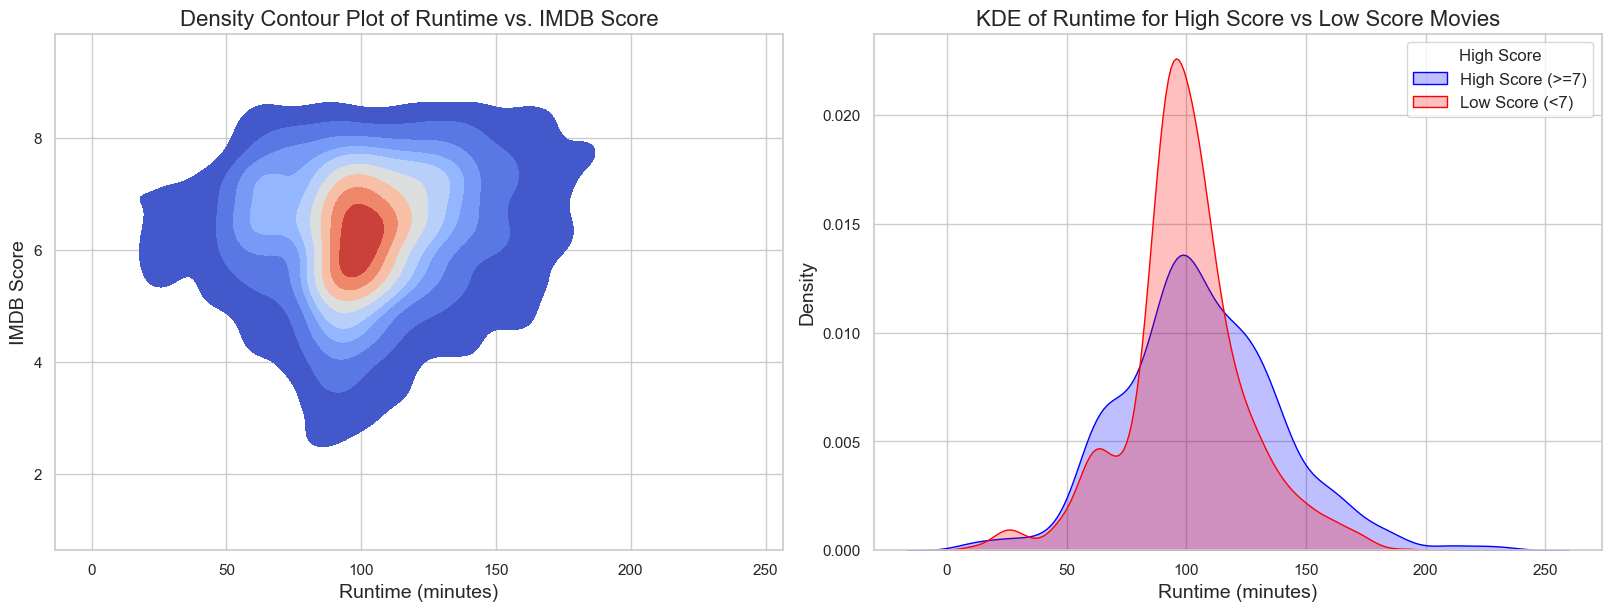

In [70]:

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# 第一幅图：Runtime vs. IMDB Score 的密度等高线图
sns.kdeplot(
    x='runtime', 
    y='imdb_score', 
    data=movies_df, 
    cmap='coolwarm', 
    fill=True, 
    ax=axes[0]
)
axes[0].set_xlabel('Runtime (minutes)', fontsize=14)
axes[0].set_ylabel('IMDB Score', fontsize=14)
axes[0].set_title('Density Contour Plot of Runtime vs. IMDB Score', fontsize=16)

# 第二幅图：High_score 和 Low_score 的 KDE 图
sns.kdeplot(
    data=movies_df[movies_df['High_score'] == 'yes'], 
    x='runtime', 
    label='High Score (>=7)', 
    shade=True, 
    color='blue', 
    ax=axes[1]
)
sns.kdeplot(
    data=movies_df[movies_df['High_score'] == 'no'], 
    x='runtime', 
    label='Low Score (<7)', 
    shade=True, 
    color='red', 
    ax=axes[1]
)
axes[1].set_xlabel('Runtime (minutes)', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].set_title('KDE of Runtime for High Score vs Low Score Movies', fontsize=16)
axes[1].legend(title='High Score', fontsize=12)

# 显示图表
plt.show()